# Analýza tabulkových dat pomocí Pythonu a knihovny Pandas

V této části se seznámíme s:

- Načítání souboru CSV do datového rámce Pandas
- Načítání dat z datových rámců Pandas
- Analýza dat v datových rámcích Pandas
- Sloučení, seskupení a agregace dat
- Základní grafy pomocí knihovny Pandas
- Zapisování dat zpět do souborů CSV

## Načítání dat ze souborů CSV pomocí knihovny Pandas

[Pandas](https://pandas.pydata.org/) je populární knihovna Pythonu používaná pro práci s tabulkovými daty (podobně jako data uložená v excelové tabulce). Pandas poskytuje funkce ke čtení dat z různých formátů souborů, jako jsou CSV, tabulky aplikace Excel, tabulky HTML, JSON, SQL a další. V tomto notebooku budeme používat již připravený dataset covid-cz, který se zabývá daty spjatými s pandemií onemocnění covid-19 v České republice.

Nejprve musíme knihovnu Pandas importovat do našeho notebooku. Je zvykem Pandas importovat pod aliasem `pd`.

Abychom data nahráli do našeho notebooku, využijeme pandas metodu `read_csv`.

In [1]:
import pandas as pd

In [2]:
covid_df = pd.read_csv('Data/covid_cz.csv')

Data ze souboru se čtou a ukládají v objektu `DataFrame` – jedné z hlavních datových struktur v Pandas pro ukládání a práci s tabulkovými daty. V názvech proměnných pro datové rámce (Dataframes) obvykle používáme příponu `_df`.

In [3]:
type(covid_df)

pandas.core.frame.DataFrame

In [4]:
covid_df

,date,new_cases,new_deaths,new_tests,new_vaccinations
0,2020-02-02,NaN,NaN,NaN,NaN
1,2020-02-09,NaN,NaN,NaN,NaN
2,2020-02-16,NaN,NaN,NaN,NaN
3,2020-02-23,NaN,NaN,NaN,NaN
4,2020-03-01,3.0,NaN,NaN,NaN
...,...,...,...,...,...
364,2021-02-24,15861.0,145.0,91299.0,19207.0
365,2021-02-25,13816.0,153.0,85033.0,22224.0
366,2021-02-26,14612.0,164.0,NaN,19039.0
367,2021-02-27,14815.0,195.0,NaN,3313.0


Při pohledu na datový rámec (Dataframe) zjistíme následující:

- Soubor obsahuje data onemocnění covid-19 v České republice
- Rámec obsahuje sloupce jako jsou new_cases, new_deaths, new_tests a new_vaccinations
- Máme zde data za 369 dní: od 12.12.2019, do 28.02.2021

Mějte na paměti, že se jedná o oficiálně hlášená čísla. Skutečný počet případů a úmrtí může být vyšší, protože ne všechny případy jsou diagnostikovány.

Některé základní informace o datovém rámci (Dataframe) si můžeme zobrazit pomocí metody `.info`.

Zdá se, že každý sloupec obsahuje hodnoty konkrétního datového typu. Statistické informace pro číselné sloupce (průměr, směrodatná odchylka, minimální / maximální hodnoty a počet neprázdných hodnot) můžete zobrazit pomocí metody `.describe`.

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              369 non-null    object 
 1   new_cases         365 non-null    float64
 2   new_deaths        344 non-null    float64
 3   new_tests         178 non-null    float64
 4   new_vaccinations  63 non-null     float64
dtypes: float64(4), object(1)
memory usage: 14.5+ KB


In [6]:
covid_df.describe()

,new_cases,new_deaths,new_tests,new_vaccinations
count,365.000000,344.000000,178.000000,63.000000
mean,3384.268493,59.125000,39068.331461,10348.317460
std,4510.461766,72.054272,22657.524857,6914.352095
min,-148.000000,-3.000000,4537.000000,262.000000
25%,103.000000,2.000000,20691.500000,3144.500000
50%,403.000000,8.000000,34877.000000,13086.000000
75%,5857.000000,126.000000,54971.250000,15808.500000
max,17773.000000,295.000000,102609.000000,22224.000000


Vlastnost `columns` obsahuje seznam sloupců v datovém rámci.

Počet řádků a sloupců v datovém rámci můžete také načíst pomocí metody `.shape`.

In [7]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests', 'new_vaccinations'], dtype='object')

In [8]:
covid_df.shape

(369, 5)

Zde je souhrn funkcí a metod, které jsme si již představili:

* `pd.read_csv` – funkce pro načtení dat ze souboru CSV do objektu Pandas `DataFrame`
* `.info()` – metoda pro zobrazení základních informací o řádcích, sloupcích a datových typech
* `.describe()` – metoda pro zobrazení statistických informací o číselných sloupcích
* `.columns` – získání seznamu názvů sloupců
* `.shape` – získání počtu řádků a sloupců jako tuple

## Čtení dat z datového rámce

První věc, kterou nejspíš budete chtít udělat, je přečíst data z tohoto datového rámce, např. počty konkrétního dne nebo seznam hodnot v konkrétním sloupci. Abychom mohli data přečíst, musíme porozumět vnitřní reprezentaci dat v datovém rámci. Koncepčně si můžete datový rámec představit jako slovník seznamů: klíče jsou názvy sloupců a hodnoty jsou seznamy/pole obsahující data pro příslušné sloupce.

In [9]:
# Formát datového rámce pandas si můžete představit takto
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

Reprezentace dat ve výše uvedeném formátu má několik výhod:

* Všechny hodnoty ve sloupci mají obvykle stejný typ hodnoty, takže je efektivnější je ukládat do jednoho pole.
* Načítání hodnot pro konkrétní řádek jednoduše vyžaduje extrahování prvků v daném indexu z každého pole sloupců.
* Reprezentace je kompaktnější (názvy sloupců se zaznamenávají pouze jednou) ve srovnání s jinými formáty, které používají slovník pro každý řádek dat (viz příklad níže).

In [10]:
# Formát datového rámce pandas není podobný tomuto
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

S ohledem na analogii slovníku seznamů nyní můžete hádat, jak načíst data z datového rámce. Můžeme například získat seznam hodnot z konkrétního sloupce pomocí indexační notace `[]`.

In [11]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [12]:
covid_df['new_cases']

0          NaN
1          NaN
2          NaN
3          NaN
4          3.0
        ...   
364    15861.0
365    13816.0
366    14612.0
367    14815.0
368     7885.0
Name: new_cases, Length: 369, dtype: float64

Každý sloupec je reprezentován pomocí datové struktury s názvem `Series`, což je v podstatě Numpy pole s některými dalšími metodami a vlastnostmi.

In [13]:
type(covid_df['new_cases'])

pandas.core.series.Series

Tak jako u Numpy pole můžete i u Pandas series pomocí indexovací notace `[]` načíst konkrétní hodnotu.

In [14]:
covid_df['new_cases'][368]

7885.0

Pandas také poskytuje metodu `.at` k přímému načtení prvku v určitém řádku a sloupci.

In [15]:
covid_df.at[368, 'new_cases']

7885.0

Místo použití indexovací notace `[]` umožňuje Pandas také přístup ke sloupcům jako vlastnostem datového rámce pomocí notace `.` Tato metoda však funguje pouze pro sloupce, jejichž názvy neobsahují mezery ani speciální znaky.

In [16]:
covid_df.new_cases

0          NaN
1          NaN
2          NaN
3          NaN
4          3.0
        ...   
364    15861.0
365    13816.0
366    14612.0
367    14815.0
368     7885.0
Name: new_cases, Length: 369, dtype: float64

Dále můžete v rámci indexovací notace `[]` předat také seznam sloupců, abyste získali přístup k podmnožině datového rámce pouze s danými sloupci.

In [17]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2020-02-02,NaN
1,2020-02-09,NaN
2,2020-02-16,NaN
3,2020-02-23,NaN
4,2020-03-01,3.0
...,...,...
364,2021-02-24,15861.0
365,2021-02-25,13816.0
366,2021-02-26,14612.0
367,2021-02-27,14815.0


Nový datový rámec `cases_df` je pouze `náhledem` původního datového rámce `covid_df`. Oba odkazují na stejná data v paměti počítače. Změnou hodnot uvnitř jedné z nich se změní také příslušné hodnoty v té druhé. Díky sdílení dat mezi datovými rámci je manipulace s daty v Pandas rychlá. Nemusíte se obtěžovat s kopírováním tisíců nebo milionů řádků pokaždé, když chcete vytvořit nový datový rámec.

Může se stát, že budete potřebovat úplnou kopii datového rámce. V takovém případě můžete použít metodu `copy`.

In [18]:
covid_df_copy = covid_df.copy()

Data v rámci `covid_df_copy` jsou zcela oddělená od` covid_df` a změna hodnot uvnitř jednoho z nich nebude mít vliv na ten druhý.

Pro přístup ke konkrétnímu řádku dat poskytuje Pandas metodu `.loc`.

In [19]:
covid_df

,date,new_cases,new_deaths,new_tests,new_vaccinations
0,2020-02-02,NaN,NaN,NaN,NaN
1,2020-02-09,NaN,NaN,NaN,NaN
2,2020-02-16,NaN,NaN,NaN,NaN
3,2020-02-23,NaN,NaN,NaN,NaN
4,2020-03-01,3.0,NaN,NaN,NaN
...,...,...,...,...,...
364,2021-02-24,15861.0,145.0,91299.0,19207.0
365,2021-02-25,13816.0,153.0,85033.0,22224.0
366,2021-02-26,14612.0,164.0,NaN,19039.0
367,2021-02-27,14815.0,195.0,NaN,3313.0


Každý načtený řádek je také objektem „Series“.

In [20]:
type(covid_df.loc[243])

pandas.core.series.Series

In [21]:
covid_df.loc[368]

date                2021-02-28
new_cases               7885.0
new_deaths               145.0
new_tests                  NaN
new_vaccinations        2608.0
Name: 368, dtype: object

In [22]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests,new_vaccinations
0,2020-02-02,NaN,NaN,NaN,NaN
1,2020-02-09,NaN,NaN,NaN,NaN
2,2020-02-16,NaN,NaN,NaN,NaN
3,2020-02-23,NaN,NaN,NaN,NaN
4,2020-03-01,3.0,NaN,NaN,NaN


In [23]:
covid_df.tail(3)

,date,new_cases,new_deaths,new_tests,new_vaccinations
366,2021-02-26,14612.0,164.0,NaN,19039.0
367,2021-02-27,14815.0,195.0,NaN,3313.0
368,2021-02-28,7885.0,145.0,NaN,2608.0


Všimněte si, že většina hodnot na začátku datasetu jsou `NaN`. Je tomu tak proto, že CSV soubor, ze kterého jsme náš dataset vytvořili, neobsahuje hodnoty pro tyto specifická data v těchto sloupcích. Tyto hodnoty mohou buď chybět nebo jsou neznámé.

Rozdíl mezi `0` a `NaN` je malý, ale důležitý. V tomto datasetu to znamená, že počty nově nakažených nebyly hlášeny k určitým datům. 

Pomocí metody sloupce` first_valid_index` můžeme najít první index, který neobsahuje hodnotu `NaN`.

Podívejme se na několik řádků před a po tomto indexu, abychom si ověřili, že se hodnoty mění z `NaN` na skutečná čísla. Můžeme to udělat předáním rozsahu do `loc`.

In [24]:
covid_df.new_cases.first_valid_index()

4

In [25]:
covid_df.loc[3:6]

,date,new_cases,new_deaths,new_tests,new_vaccinations
3,2020-02-23,NaN,NaN,NaN,NaN
4,2020-03-01,3.0,NaN,NaN,NaN
5,2020-03-02,0.0,NaN,NaN,NaN
6,2020-03-03,2.0,NaN,NaN,NaN


Můžeme použít metodu `.sample`, která nám umožní načíst náhodný vzorek řádků z datového rámce.

In [26]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests,new_vaccinations
57,2020-04-23,55.0,2.0,NaN,NaN
176,2020-08-20,247.0,2.0,NaN,NaN
133,2020-07-08,129.0,0.0,NaN,NaN
362,2021-02-22,4021.0,116.0,102609.0,15740.0
90,2020-05-26,48.0,0.0,NaN,NaN
213,2020-09-26,1976.0,10.0,15388.0,NaN
47,2020-04-13,68.0,5.0,NaN,NaN
78,2020-05-14,82.0,3.0,NaN,NaN
269,2020-11-21,3187.0,74.0,23287.0,NaN
29,2020-03-26,271.0,3.0,NaN,NaN


Všimněte si, že i když jsme si zvolili náhodný vzorek, původní index každého řádku zůstal zachován – to je užitečná vlastnost datových rámců.

Zde je souhrn funkcí a metod, které jsme si v této části představili:

- `covid_df['new_cases']` – načítání sloupců jako `Série` pomocí názvu sloupce
- `new_cases[243]` – načítání hodnot ze `Series` pomocí indexu
- `covid_df.at[243, 'new_cases']` – načítání jedné hodnoty z datového rámce
- `covid_df.copy()` – vytvoření kopie datového rámce
- `covid_df.loc[243]` – načítání řádku nebo rozsahu řádků z datového rámce
- `head`, `tail`, a `sample` – načítání více řádků z datového rámce
- `covid_df.new_tests.first_valid_index()` – nalezení prvního neprázdného indexu v `series`

## Analýza dat z datových rámců

Pokusme se odpovědět na několik otázek týkajících se našich dat.

**Q: Jaký je celkový počet hlášených případů a úmrtí s nemocí Covid-19 v České republice?**

Podobně jako pole Numpy podporuje Pandas `series` metodu `sum` pro zodpovězení těchto otázek.

In [27]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [28]:
print('Počet nakažených je {} a počet mrtvých je {}.'.format(int(total_cases), int(total_deaths)))

Počet nakažených je 1235258 a počet mrtvých je 20339.


**Q: Jaká je celková míra úmrtnosti (poměr hlášených úmrtí k hlášeným případům)?**

In [29]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [30]:
print("V České republice je úmrtnost na onemocnění covid-19 {:.2f} %.".format(death_rate*100))

V České republice je úmrtnost na onemocnění covid-19 1.65 %.


In [31]:
covid_df.new_tests.first_valid_index()

188

In [32]:
covid_df.new_tests[188]

11137.0

**Q: Jaký je celkový počet provedených testů?**

In [33]:
total_tests = covid_df.new_tests.sum()
total_tests

6954163.0

**Q: Kolik procent z testů mělo pozitivní výsledek?**

In [34]:
positive_rate = total_cases / total_tests

In [35]:
print('{:.2f}% test; bylo pozitivních v České republice.'.format(positive_rate*100))

17.76% test; bylo pozitivních v České republice.


Zkuste si odpovědět na několik dalších otázek týkajících se našich dat pomocí prázdných buněk níže.

## Dotazování se na data a řazení řádků

Řekněme, že se chceme podívat jen na dny, kdy bylo hlášeno více než 1000 případů. Můžeme použít booleovský výraz ke kontrole, které řádky splňují toto kritérium.

In [36]:
high_new_cases = covid_df.new_cases > 1000

In [37]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
364     True
365     True
366     True
367     True
368     True
Name: new_cases, Length: 369, dtype: bool

Logický výraz vrací řadu obsahující logické hodnoty `True` a` False`. Tuto řadu můžete použít k výběru podmnožiny řádků z původního datového rámce odpovídajících hodnotám „True“ v řadě.

In [38]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests,new_vaccinations
195,2020-09-08,1161.0,4.0,16115.0,NaN
196,2020-09-09,1159.0,3.0,15506.0,NaN
197,2020-09-10,1377.0,4.0,16513.0,NaN
198,2020-09-11,1447.0,2.0,19217.0,NaN
199,2020-09-12,1541.0,3.0,13317.0,NaN
...,...,...,...,...,...
364,2021-02-24,15861.0,145.0,91299.0,19207.0
365,2021-02-25,13816.0,153.0,85033.0,22224.0
366,2021-02-26,14612.0,164.0,NaN,19039.0
367,2021-02-27,14815.0,195.0,NaN,3313.0


Můžeme to stručně zapsat do jednoho řádku předáním logického výrazu jako indexu do datového rámce. 

In [39]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [40]:
high_cases_df

,date,new_cases,new_deaths,new_tests,new_vaccinations
195,2020-09-08,1161.0,4.0,16115.0,NaN
196,2020-09-09,1159.0,3.0,15506.0,NaN
197,2020-09-10,1377.0,4.0,16513.0,NaN
198,2020-09-11,1447.0,2.0,19217.0,NaN
199,2020-09-12,1541.0,3.0,13317.0,NaN
...,...,...,...,...,...
364,2021-02-24,15861.0,145.0,91299.0,19207.0
365,2021-02-25,13816.0,153.0,85033.0,22224.0
366,2021-02-26,14612.0,164.0,NaN,19039.0
367,2021-02-27,14815.0,195.0,NaN,3313.0


Datový rámec obsahuje 171 řádků, ale ve výchozím nastavení pro stručnost zobrazuje Jupyter pouze prvních a posledních pět. Abychom si zobrazili všechny řádky, můžeme změnit některé možnosti zobrazení.

In [41]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests,new_vaccinations
195,2020-09-08,1161.0,4.0,16115.0,NaN
196,2020-09-09,1159.0,3.0,15506.0,NaN
197,2020-09-10,1377.0,4.0,16513.0,NaN
198,2020-09-11,1447.0,2.0,19217.0,NaN
199,2020-09-12,1541.0,3.0,13317.0,NaN
...,...,...,...,...,...
364,2021-02-24,15861.0,145.0,91299.0,19207.0
365,2021-02-25,13816.0,153.0,85033.0,22224.0
366,2021-02-26,14612.0,164.0,NaN,19039.0
367,2021-02-27,14815.0,195.0,NaN,3313.0


Můžeme také formulovat složitější dotazy, které zahrnují více sloupců. Jako příklad se pokusme určit dny, kdy je poměr hlášených případů k provedeným testům vyšší než celková `positive_rate`.

In [42]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests,new_vaccinations
221,2020-10-04,1841.0,16.0,7776.0,NaN
223,2020-10-06,4456.0,36.0,23045.0,NaN
224,2020-10-07,5338.0,35.0,24020.0,NaN
225,2020-10-08,5397.0,40.0,25073.0,NaN
226,2020-10-09,8617.0,36.0,27743.0,NaN
...,...,...,...,...,...
347,2021-02-07,4863.0,106.0,23877.0,3147.0
353,2021-02-13,8883.0,156.0,35449.0,4431.0
354,2021-02-14,5160.0,85.0,28472.0,2342.0
360,2021-02-20,11364.0,184.0,39320.0,3018.0


Výsledkem provedení artimetických operací na dvou sloupcích je nová Pandas `series`.

In [43]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
364    0.173726
365    0.162478
366         NaN
367         NaN
368         NaN
Length: 369, dtype: float64

Tuto `series` můžeme použít k přidání nového sloupce do datového rámce.

In [44]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [45]:
covid_df.sample(5)

,date,new_cases,new_deaths,new_tests,new_vaccinations,positive_rate
65,2020-05-01,55.0,4.0,NaN,NaN,NaN
195,2020-09-08,1161.0,4.0,16115.0,NaN,0.072045
249,2020-11-01,6542.0,178.0,20643.0,NaN,0.316911
39,2020-04-05,115.0,8.0,NaN,NaN,NaN
183,2020-08-27,218.0,0.0,NaN,NaN,NaN


In [46]:
covid_df.drop(columns=['positive_rate'], inplace=True)

Musíme však mít na paměti, že získání výsledků testu může trvat několik dní, takže nemůžeme porovnávat počet nových případů s počtem testů provedených ve stejný den. Jakýkoli závěr založený na tomto sloupci „positive_rate“ bude pravděpodobně nesprávný. Je důležité dávat pozor na jemné vztahy, které často nejsou přenášeny v souborech CSV a vyžadují nějaký externí kontext. Vždy je dobré přečíst si dokumentaci dodanou s datovou sadou nebo požádat o další informace.

Prozatím odstraníme sloupec `positive_rate` pomocí metody `.drop `.

Dokážete pochopit účel argumentu `inplace`?

### Řazení řádků pomocí hodnot sloupců

Řádky lze také řadit podle konkrétního sloupce pomocí `.sort_values`. Pojďme naše data seřadit, abychom identifikovali dny s nejvyšším počtem případů. Poté využijeme metodu `head` a zobrazíme pouze prvních deset výsledků.

In [47]:
covid_df.sort_values('new_cases', ascending=False).head(5)

,date,new_cases,new_deaths,new_tests,new_vaccinations
316,2021-01-07,17773.0,185.0,67108.0,7968.0
315,2021-01-06,17332.0,179.0,68696.0,5821.0
309,2020-12-31,17039.0,151.0,47079.0,1313.0
308,2020-12-30,16420.0,127.0,66958.0,3473.0
364,2021-02-24,15861.0,145.0,91299.0,19207.0


Nejvíce nakažených přibylo na přelomu roku. Pojďme se podívat na dny, kdy bylo nejvíce mrtvých, a zjistit, zda se bude jednat o týden po přelomu nového roku.

In [48]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests,new_vaccinations
258,2020-11-10,12699.0,295.0,43495.0,NaN
251,2020-11-03,12089.0,259.0,43629.0,NaN
259,2020-11-11,8925.0,247.0,47048.0,NaN
250,2020-11-02,9252.0,225.0,32916.0,NaN
252,2020-11-04,15731.0,220.0,46098.0,NaN
247,2020-10-30,13605.0,216.0,46822.0,NaN
321,2021-01-12,9345.0,213.0,66426.0,13397.0
264,2020-11-16,5407.0,208.0,44487.0,NaN
363,2021-02-23,11311.0,207.0,92985.0,19201.0
323,2021-01-14,10922.0,200.0,56196.0,15139.0


Vidíme, že nejvíce mrtvých přibylo na začátku listopadu, což nám nepotvrzuje hypotézu, že nejvíce mrtvých bude týden po nejvyšším počtu nakažených.

Podívejme se také na dny s nejmenším počtem případů. Můžeme očekávat, že na tomto seznamu uvidíme prvních pár dní roku.

In [49]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests,new_vaccinations
84,2020-05-20,-148.0,2.0,NaN,NaN
5,2020-03-02,0.0,NaN,NaN,NaN
12,2020-03-09,0.0,NaN,NaN,NaN
285,2020-12-07,0.0,0.0,49092.0,NaN
10,2020-03-07,1.0,NaN,NaN,NaN
6,2020-03-03,2.0,NaN,NaN,NaN
4,2020-03-01,3.0,NaN,NaN,NaN
7,2020-03-04,3.0,NaN,NaN,NaN
15,2020-03-12,3.0,NaN,NaN,NaN
8,2020-03-05,4.0,NaN,NaN,NaN


Zdá se, že počet nových případů 20. června 2020 byl „-148“, což je záporné číslo! Rozhodně nic, co bychom mohli očekávat, ale to je povaha dat ze skutečného světa. Může se jednat o chybu při zadávání údajů, nebo mohla vláda v minulosti vydat opravu, která by zohlednila nesprávné započítání.

Podívejme se na několik dní před a po 20. červnu 2020.

In [50]:
covid_df.loc[82:87]

,date,new_cases,new_deaths,new_tests,new_vaccinations
82,2020-05-18,111.0,-1.0,NaN,NaN
83,2020-05-19,61.0,5.0,NaN,NaN
84,2020-05-20,-148.0,2.0,NaN,NaN
85,2020-05-21,33.0,2.0,NaN,NaN
86,2020-05-22,59.0,6.0,NaN,NaN
87,2020-05-23,77.0,2.0,NaN,NaN


Prozatím předpokládejme, že se skutečně jednalo o chybu zadávání dat. Pro řešení chybějící nebo vadné hodnoty můžeme použít jeden z následujících přístupů:
1. Změnit hodnotu na `0`.
2. Nahradit ji průměrem celého sloupce.
3. Nahradit ji průměrem hodnot z předchozího a následujícího data.
4. Vyřadit řádek z analýzy.

Který přístup si vyberete, závisí na kontextu daných dat a problému. V tomto případě, protože máme co do činění s daty seřazenými podle data, můžeme pokračovat třetím přístupem.

K úpravě konkrétní hodnoty v datovém rámci můžete použít metodu `.at`.

In [51]:
covid_df.at[84, 'new_cases'] = (covid_df.at[83, 'new_cases'] + covid_df.at[85, 'new_cases'])/2

Zde je souhrn funkcí a metod, které jsme si představili v této části:

- `covid_df.new_cases.sum()` – výpočet součtu hodnot ve sloupci nebo řadě
- `covid_df[covid_df.new_cases > 1000]` – dotazování se na podmnožinu řádků splňujících zvolená kritéria pomocí booleovských výrazů
- `df['pos_rate'] = df.new_cases/df.new_tests` – přidávání nových sloupců kombinací dat ze sloupců stávajících
- `covid_df.drop('positive_rate')` – odebrání jednoho nebo více sloupců z datového rámce
- `sort_values` – řazení řádků datového rámce pomocí hodnot sloupců
- `covid_df.at[172, 'new_cases'] = ...` – nahrazení hodnoty v datovém rámci

## Práce s kalendářními daty

Dosud jsme zkoumali celková čísla případů, testů, kladné míry atd., Bylo by ale užitečné studovat tato čísla i měsíc po měsíci. Hodit by se tu mohl sloupec `date`, protože Pandas poskytuje mnoho nástrojů pro práci s daty.

In [52]:
covid_df.date

0      2020-02-02
1      2020-02-09
2      2020-02-16
3      2020-02-23
4      2020-03-01
          ...    
364    2021-02-24
365    2021-02-25
366    2021-02-26
367    2021-02-27
368    2021-02-28
Name: date, Length: 369, dtype: object

Datový typ kalendářního data je aktuálně `object`, takže Pandas neví, že tento sloupec je datum. Můžeme jej převést do sloupce `datetime` pomocí metody `pd.to_datetime`.

In [53]:
covid_df['date']

0      2020-02-02
1      2020-02-09
2      2020-02-16
3      2020-02-23
4      2020-03-01
          ...    
364    2021-02-24
365    2021-02-25
366    2021-02-26
367    2021-02-27
368    2021-02-28
Name: date, Length: 369, dtype: object

In [54]:
covid_df['date'] = pd.to_datetime(covid_df.date)

Vidíme, že typ se změnil na `datetime64`. Nyní můžeme extrahovat různé části dat do samostatných sloupců pomocí `DatetimeIndex` třídy ([view docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)).

In [55]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [56]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,new_vaccinations,year,month,day,weekday
0,2020-02-02,NaN,NaN,NaN,NaN,2020,2,2,6
1,2020-02-09,NaN,NaN,NaN,NaN,2020,2,9,6
2,2020-02-16,NaN,NaN,NaN,NaN,2020,2,16,6
3,2020-02-23,NaN,NaN,NaN,NaN,2020,2,23,6
4,2020-03-01,3.0,NaN,NaN,NaN,2020,3,1,6


Podívejme se na celkové metriky pro květen. Můžeme se dotazovat na řádky pro květen, vybrat podmnožinu sloupců a použít metodu `sum` k agregaci hodnot každého vybraného sloupce.

In [57]:
# Vuberme data pro měsíc Květen
covid_df_may = covid_df[covid_df.month == 5]

# Extrahujte podmnožinu sloupců, které se mají agregovat
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Sečtěte sloupce
covid_may_totals = covid_df_may_metrics.sum()

In [58]:
covid_may_totals

new_cases     1559.0
new_deaths      84.0
new_tests        0.0
dtype: float64

In [59]:
covid_may_totals

new_cases     1559.0
new_deaths      84.0
new_tests        0.0
dtype: float64

Výše uvedené operace můžeme také kombinovat do jednoho příkazu.

In [60]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases     1559.0
new_deaths      84.0
new_tests        0.0
dtype: float64

Jako další příklad zkontrolujte, zda je počet případů hlášených v neděli vyšší než průměrný počet případů hlášený každý den. Tentokrát můžeme chtít agregovat sloupce pomocí metody `.mean`.

In [61]:
# Celkový průměr
covid_df.new_cases.mean()

3384.8027397260275

In [62]:
# Průměr pro neděle
covid_df[covid_df.weekday == 6].new_cases.mean()

1969.6603773584907

Zdá se, že v neděli bylo hlášeno méně případů ve srovnání s jinými dny.

Zkuste pomocí níže uvedených buněk zodpovědět na některé další otázky týkající se našich dat.

## Seskupování a agregace

V dalším kroku můžeme chtít shrnout denní data a vytvořit nový datový rámec s měsíčními daty. Pomocí funkce `groupby` můžeme vytvořit skupinu pro každý měsíc, vybrat sloupce, které chceme agregovat, a agregovat je pomocí metody` sum`.

In [63]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [64]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,266113.0,4728.0,1563110.0
2,250706.0,4031.0,1647823.0
3,3308.0,31.0,0.0
4,4374.0,205.0,0.0
5,1559.0,84.0,0.0
6,2686.0,29.0,0.0
7,4620.0,33.0,0.0
8,8044.0,42.0,0.0
9,46145.0,231.0,477078.0


Výsledkem je nový datový rámec, který jako index používá unikátní hodnoty ze sloupce předaného do metody `.groupby`. Seskupování a agregace je výkonná metoda postupné sumarizace dat do menších datových rámců.

Místo agregace podle součtu můžete agregovat také podle jiných měr, jako je průměr. Pojďme vypočítat průměrný počet denních nových případů, úmrtí a testů za každý měsíc.

In [65]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [66]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,8584.290323,152.516129,50422.903226
2,8953.785714,143.964286,65912.920000
3,106.709677,3.100000,NaN
4,145.800000,6.833333,NaN
5,50.290323,2.709677,NaN
6,89.533333,0.966667,NaN
7,149.032258,1.064516,NaN
8,259.483871,1.354839,NaN
9,1538.166667,7.700000,15902.600000


Kromě seskupování je další formou agregace průběžný nebo kumulativní součet případů, testů nebo úmrtí až do data každého řádku. Můžeme použít metodu `cumsum` k výpočtu kumulativního součtu sloupce jako nové řady. Přidejte tři nové sloupce: `total_cases`,` total_deaths` a `total_tests`.

In [67]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [68]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [69]:
covid_df['total_tests'] = covid_df.new_tests.cumsum()

In [70]:
covid_df

,date,new_cases,new_deaths,new_tests,new_vaccinations,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2020-02-02,NaN,NaN,NaN,NaN,2020,2,2,6,NaN,NaN,NaN
1,2020-02-09,NaN,NaN,NaN,NaN,2020,2,9,6,NaN,NaN,NaN
2,2020-02-16,NaN,NaN,NaN,NaN,2020,2,16,6,NaN,NaN,NaN
3,2020-02-23,NaN,NaN,NaN,NaN,2020,2,23,6,NaN,NaN,NaN
4,2020-03-01,3.0,NaN,NaN,NaN,2020,3,1,6,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
364,2021-02-24,15861.0,145.0,91299.0,19207.0,2021,2,24,2,1184325.0,19682.0,6869130.0
365,2021-02-25,13816.0,153.0,85033.0,22224.0,2021,2,25,3,1198141.0,19835.0,6954163.0
366,2021-02-26,14612.0,164.0,NaN,19039.0,2021,2,26,4,1212753.0,19999.0,NaN
367,2021-02-27,14815.0,195.0,NaN,3313.0,2021,2,27,5,1227568.0,20194.0,NaN


Všimněte si, že hodnoty `NaN` ve sloupci` total_tests` zůstaly nedotčeny.

## Zápis dat zpět do souborů

Po dokončení analýzy a přidání nových sloupců byste měli výsledky zapsat zpět do souboru. Jinak dojde při vypnutí notebooku Jupyter ke ztrátě dat. Před zápisem do souboru si nejprve vytvořme datový rámec obsahující pouze sloupce, které chceme zaznamenat.

In [71]:
result_df = covid_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests']]

In [72]:
result_df.head()

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests
0,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-01,3.0,3.0,NaN,NaN,NaN,NaN


In [73]:
result_df.to_csv('results.csv', index=None)

K zápisu dat z datového rámce do souboru můžeme použít funkci `to_csv`.

Funkce `to_csv` také standardně obsahuje další sloupec pro ukládání indexu datového rámce. Abychom toto chování vypnuli, předáme `index = None`.

## Základní vykreslování pomocí knihovny Pandas

V notebooku Jupyter obecně používáme knihovnu jako `matplotlib` nebo` seaborn` pro vykreslování grafů. Datové rámce a řady Pandas však poskytují praktickou metodu `.plot` pro rychlé a snadné vykreslování.

Nakreslíme spojnicový graf ukazující, jak se počet denních případů v průběhu času mění.

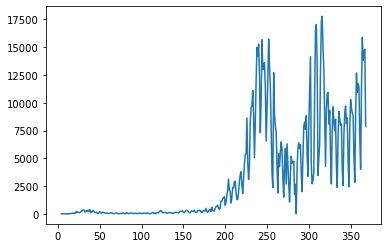

In [74]:
result_df.new_cases.plot();

Zatímco tento graf ukazuje celkový trend, je těžké určit, kde došlo k vrcholu, protože na ose X nejsou žádná data. K řešení tohoto problému můžeme použít sloupec `date` jako index pro datový rámec.

In [75]:
result_df.set_index('date', inplace=True)

In [76]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests
date,,,,,,
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-23,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,3.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-02-24,15861.0,1184325.0,145.0,19682.0,91299.0,6869130.0
2021-02-25,13816.0,1198141.0,153.0,19835.0,85033.0,6954163.0
2021-02-26,14612.0,1212753.0,164.0,19999.0,NaN,NaN


Všimněte si, že index datového rámce nemusí být číselný. Použití data jako indexu nám také umožňuje získat vstup pro konkrétní data pomocí `.loc`.

In [77]:
result_df.loc['2020-09-01']

new_cases         499.0
total_cases     25090.0
new_deaths          1.0
total_deaths      425.0
new_tests       11137.0
total_tests     11137.0
Name: 2020-09-01 00:00:00, dtype: float64

Pojďme vykreslit nové případy a nová úmrtí za den jako spojnicové grafy.

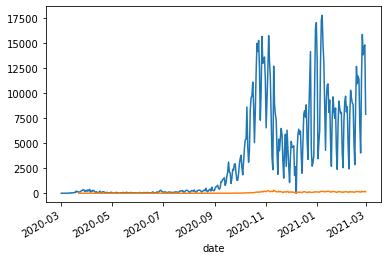

In [78]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

Můžeme také porovnat celkový počet případů s celkovým počtem úmrtí.

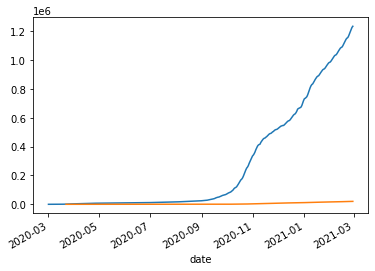

In [79]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

Podívejme se, jak se úmrtnost mění čase.

In [80]:
death_rate = result_df.total_deaths / result_df.total_cases

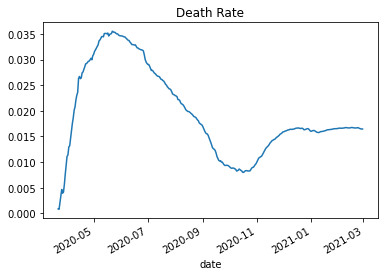

In [81]:
death_rate.plot(title='Death Rate');

Nakonec si pojďme zobrazit některá měsíční data pomocí sloupcového grafu k vizualizaci trendu na vyšší úrovni.

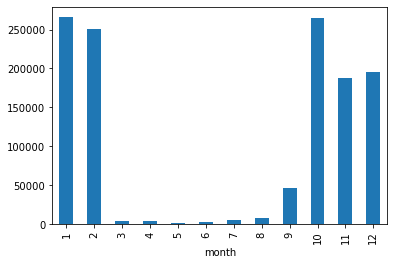

In [82]:
covid_month_df.new_cases.plot(kind='bar');

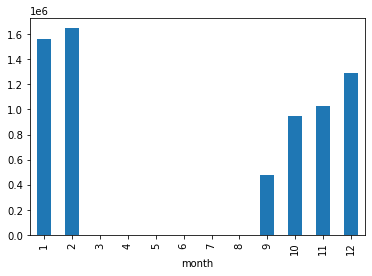

In [83]:
covid_month_df.new_tests.plot(kind='bar')